In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("housing_price.txt", delimiter=",")
df.columns = ['size', 'garbage', 'price']
df = df[['size', 'price']]

In [5]:
x = (df['size'] - np.mean(df['size']) / np.std(df['size']))
y = (df['price'] - np.mean(df['price']) / np.std(df['price']))

65766.59771522251 137.44975049676836


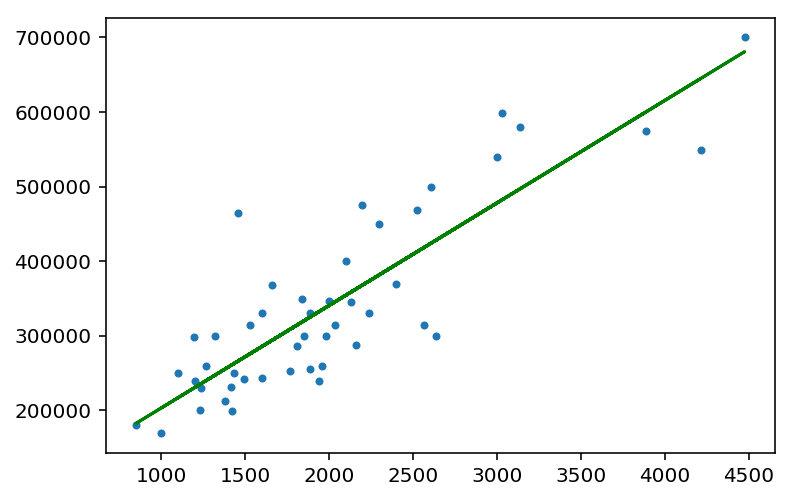

In [6]:
plt.scatter(x, y, marker='.')
theta1 = np.cov(x,y)[0,1]/np.var(x)
theta0 = np.mean(y) - theta1*np.mean(x)
print(theta0, theta1)
plt.plot(x,theta0+theta1*x,'g')

In [5]:
%matplotlib inline

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model, datasets

In [7]:
housing = datasets.load_boston()
boston = pd.DataFrame(housing.data, columns=housing.feature_names)
boston['PRICE'] = housing.target

In [8]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns=['LSTAT','RM'])
X = boston.drop('PRICE', axis=1)
Y = boston['PRICE']

In [18]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

In [11]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(404, 13) (102, 13)
(404,) (102,)


In [19]:
model = linear_model.LinearRegression(normalize=True)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

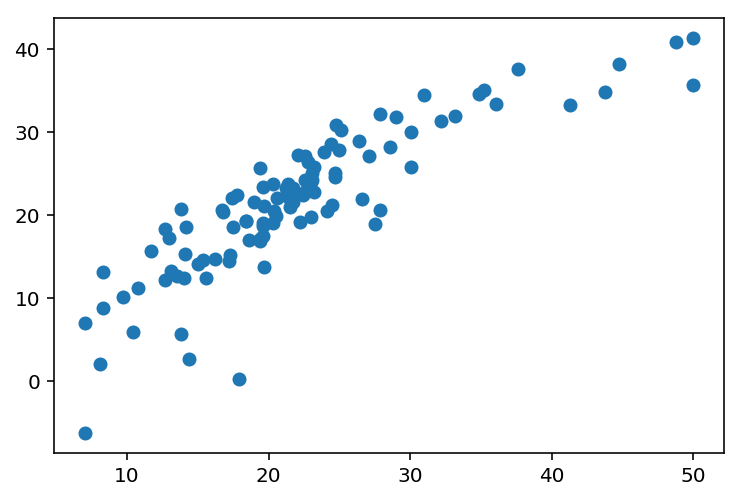

In [20]:
Y_pred = model.predict(X_test)
plt.scatter(y_test, Y_pred)

In [21]:
Y_pred == y_test

226    False
292    False
90     False
373    False
273    False
417    False
503    False
234    False
111    False
472    False
99     False
339    False
309    False
304    False
272    False
346    False
412    False
151    False
496    False
410    False
490    False
132    False
224    False
318    False
284    False
444    False
321    False
116    False
333    False
351    False
       ...  
49     False
409    False
407    False
353    False
170    False
149    False
263    False
421    False
471    False
163    False
221    False
434    False
66     False
449    False
499    False
392    False
297    False
352    False
186    False
21     False
479    False
442    False
329    False
52     False
134    False
349    False
212    False
156    False
480    False
248    False
Name: PRICE, Length: 102, dtype: bool

In [22]:
from sklearn.metrics import r2_score
r2_score(Y_pred, y_test)

0.7239358181605369

In [23]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_pred, y_test)
print(mse)

20.869292183770842
